In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout,Activation,AveragePooling2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
import sklearn.metrics
import plotly.express as px
from conf_matrix_vis import make_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import os

In [9]:
dataset = np.load("../converted_dataset2.npy",allow_pickle=True)
np.random.shuffle(dataset)


test_dataset = np.load("../converted_test_dataset2.npy",allow_pickle=True)
np.random.shuffle(test_dataset)



img_row=28
img_col=28


N = np.shape(dataset)[0]
N2 = np.shape(test_dataset)[0]

x_train = dataset[:N, 0]
x_train = np.array([x.reshape(img_row, img_col, 1) for x in x_train])
y_train = dataset[:N, 1]
y_train = np.array([[x] for x in y_train])

x_test = test_dataset[:N2, 0]
x_test = np.array([x.reshape(img_row, img_col, 1) for x in x_test])
y_test = test_dataset[:N2, 1]
y_test = np.array([[x] for x in y_test])

x_train=x_train/255.0
x_test=x_test/255.0


print(len(x_train))
print(len(x_test))


95000
20000


In [10]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])



In [12]:
history = model.fit(x_train,y_train,
              batch_size=32,
              epochs=5,
              validation_split=0.2,
              shuffle=True,
              verbose=2)

Epoch 1/5
2375/2375 - 13s - loss: 0.0691 - accuracy: 0.9787 - val_loss: 0.0468 - val_accuracy: 0.9857
Epoch 2/5
2375/2375 - 12s - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0373 - val_accuracy: 0.9884
Epoch 3/5
2375/2375 - 12s - loss: 0.0312 - accuracy: 0.9907 - val_loss: 0.0269 - val_accuracy: 0.9921
Epoch 4/5
2375/2375 - 12s - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0232 - val_accuracy: 0.9931
Epoch 5/5
2375/2375 - 12s - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0226 - val_accuracy: 0.9938


In [13]:
predictions = model.predict(x_test)

In [14]:
rounded = [[round(x[0])] for x in predictions]

target_names = ["malicious","benign"]
print(sklearn.metrics.classification_report(y_test,rounded,labels = [1,0], target_names=target_names))

              precision    recall  f1-score   support

   malicious       0.99      0.94      0.96     10000
      benign       0.94      0.99      0.97     10000

    accuracy                           0.96     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.96      0.96     20000



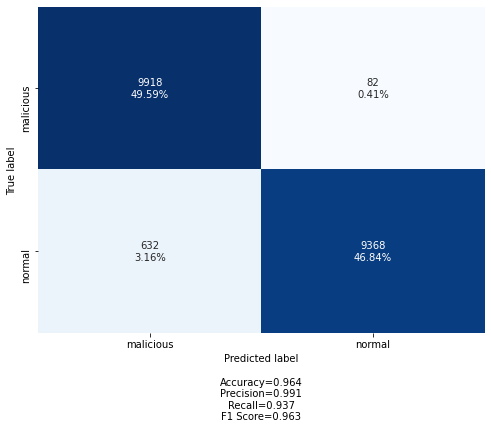

In [15]:
cf_matrix = confusion_matrix(y_test,rounded)
make_confusion_matrix(cf_matrix, figsize=(8,6),categories=["malicious","normal"], cbar=False)

In [ ]:
#Precision=TP/(TP+FP) ratio of correctly predicted as attacks to all samples predicted as attacks
#Recall=DetectionRate=TP/(TP+FN) ratio of correctly predicted as attacks to all samples that are actually attacks
#FalseAlarmRate=FP/(FP+TN) ratio of incorrectly predicted samples as attacks to all samples that are actually bening
#TrueNegativeRate=TN/(TN+FP) ratio of correctly predicted as benign to all samples predicted as benign

In [20]:
#How many convolutional layers/pooling pairs

nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,(3, 3),padding='same',activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    if j>0:
        model[j].add(Conv2D(48,(3, 3),padding='same',activation='relu'))
        model[j].add(MaxPooling2D((2, 2)))
    if j>1:
        model[j].add(Conv2D(64,(3, 3),padding='same',activation='relu'))
        model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
history = [0] * nets
names = ["Conv/Pool-1pairs","Conv/Pool-2pairs","Conv/Pool-3pairs"]
ep=5
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.2,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN Conv/Pool-1pairs: Epochs=5, Train accuracy=0.99507, Validation accuracy=0.99521
CNN Conv/Pool-2pairs: Epochs=5, Train accuracy=0.99608, Validation accuracy=0.99595
CNN Conv/Pool-3pairs: Epochs=5, Train accuracy=0.99614, Validation accuracy=0.99705


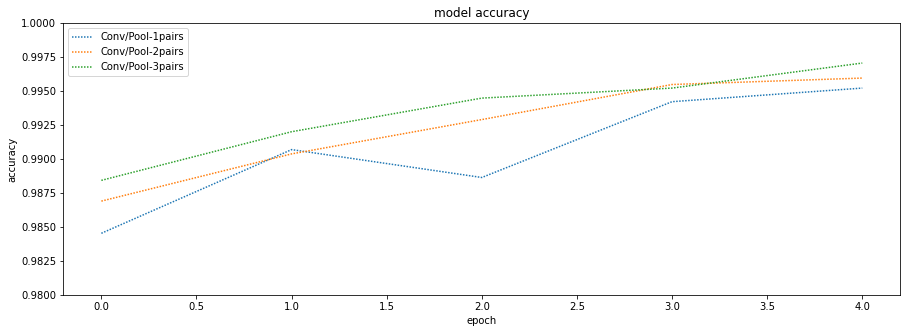

In [22]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [32]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Conv2D(j*16+16,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [33]:
#How many maps
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
ep=5
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.2,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=5, Train accuracy=0.99261, Validation accuracy=0.99279
CNN 16 maps: Epochs=5, Train accuracy=0.99338, Validation accuracy=0.99279
CNN 24 maps: Epochs=5, Train accuracy=0.99413, Validation accuracy=0.99421
CNN 32 maps: Epochs=5, Train accuracy=0.99445, Validation accuracy=0.99411
CNN 48 maps: Epochs=5, Train accuracy=0.99487, Validation accuracy=0.99447
CNN 64 maps: Epochs=5, Train accuracy=0.99516, Validation accuracy=0.99384


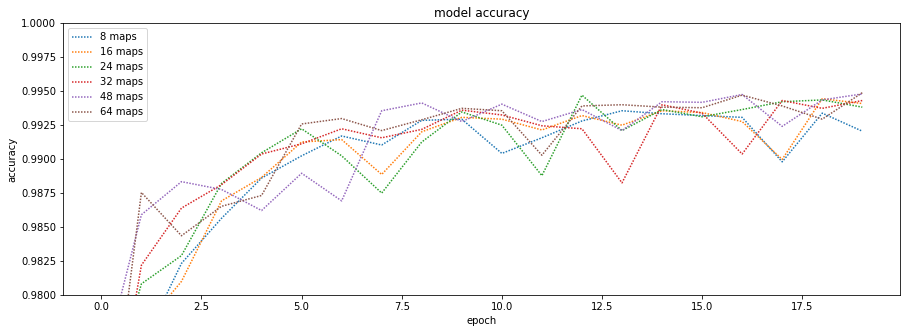

In [89]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [40]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(24,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Conv2D(48,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [41]:
history = [0] * nets
names = ["0Neurons","32Neurons","64Neurons","128Neurons","256Neurons","512Neurons","1024Neurons","2048Neurons"]
ep = 5
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.2,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0Neurons: Epochs=10, Train accuracy=0.98620, Validation accuracy=0.98603
CNN 320Neurons: Epochs=10, Train accuracy=0.99280, Validation accuracy=0.99155
CNN 640Neurons: Epochs=10, Train accuracy=0.99280, Validation accuracy=0.99248
CNN 1280Neurons: Epochs=10, Train accuracy=0.99356, Validation accuracy=0.99337
CNN 2560Neurons: Epochs=10, Train accuracy=0.99445, Validation accuracy=0.99213
CNN 5120Neurons: Epochs=10, Train accuracy=0.99433, Validation accuracy=0.99381
CNN 10240Neurons: Epochs=10, Train accuracy=0.99488, Validation accuracy=0.99323
CNN 20480Neurons: Epochs=10, Train accuracy=0.99492, Validation accuracy=0.99474


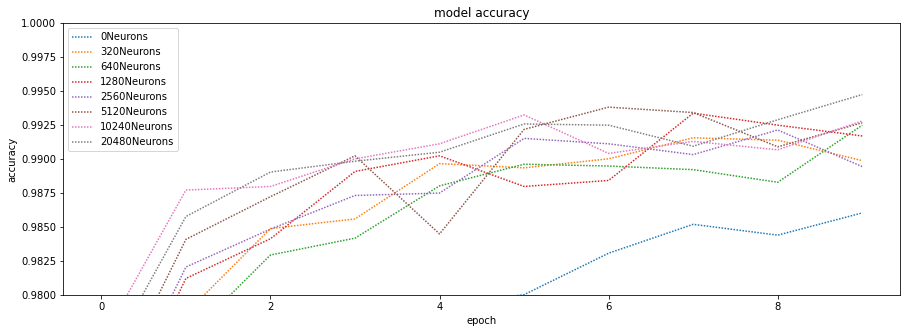

In [42]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [43]:
#Dropout
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(24,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(48,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
history = [0] * nets
names = ["Dropout0%","Dropout10%","Dropout20%","Dropout30%","Dropout40%","Dropout50%","Dropout60%","Dropout70%"]
ep = 2
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.3,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN Dropout0%: Epochs=10, Train accuracy=0.99443, Validation accuracy=0.99372
CNN Dropout10%: Epochs=10, Train accuracy=0.99050, Validation accuracy=0.99129
CNN Dropout20%: Epochs=10, Train accuracy=0.98620, Validation accuracy=0.99085
CNN Dropout30%: Epochs=10, Train accuracy=0.98118, Validation accuracy=0.98611
CNN Dropout40%: Epochs=10, Train accuracy=0.97652, Validation accuracy=0.98218
CNN Dropout50%: Epochs=10, Train accuracy=0.96696, Validation accuracy=0.97431
CNN Dropout60%: Epochs=10, Train accuracy=0.95717, Validation accuracy=0.96851
CNN Dropout70%: Epochs=10, Train accuracy=0.94600, Validation accuracy=0.95865


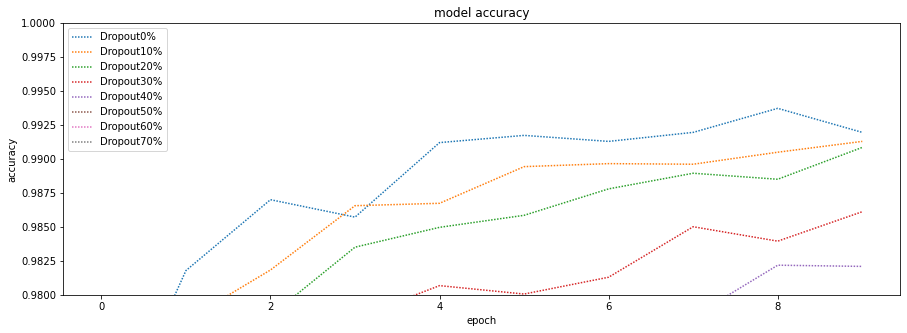

In [45]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [28]:
model= Sequential()
model.add(Conv2D(32,(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(64,(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])


In [16]:
history = model.fit(x_train,y_train,
              batch_size=32,
              epochs=5,
              validation_split=0.2,
              shuffle=True,
              verbose=2)

Epoch 1/5
2375/2375 - 12s - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0159 - val_accuracy: 0.9953
Epoch 2/5
2375/2375 - 12s - loss: 0.0117 - accuracy: 0.9964 - val_loss: 0.0146 - val_accuracy: 0.9958
Epoch 3/5
2375/2375 - 12s - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0128 - val_accuracy: 0.9965
Epoch 4/5
2375/2375 - 12s - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0166 - val_accuracy: 0.9964
Epoch 5/5
2375/2375 - 12s - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0112 - val_accuracy: 0.9974


In [17]:
predictions = model.predict(x_test)

In [18]:
rounded = [[round(x[0])] for x in predictions]

target_names = ["malicious","benign"]
print(sklearn.metrics.classification_report(y_test,rounded,labels = [1,0], target_names=target_names))

              precision    recall  f1-score   support

   malicious       0.99      0.95      0.97     10000
      benign       0.95      0.99      0.97     10000

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



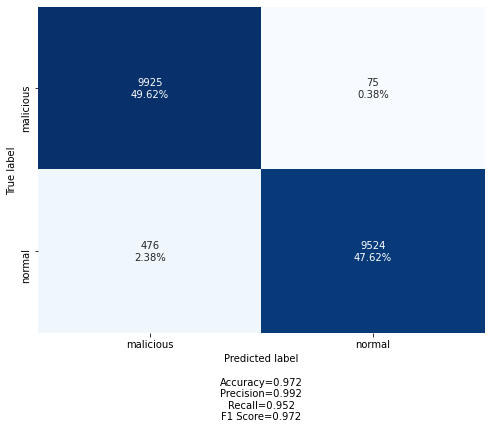

In [19]:
cf_matrix = confusion_matrix(y_test,rounded)
make_confusion_matrix(cf_matrix, figsize=(8,6),categories=["malicious","normal"], cbar=False)